In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Strong Scaling

In [ ]:
omp_strong = pd.read_csv('csv/omp_strong_scaling.csv')
mpi_strong = pd.read_csv('csv/mpi_strong_scaling.csv')

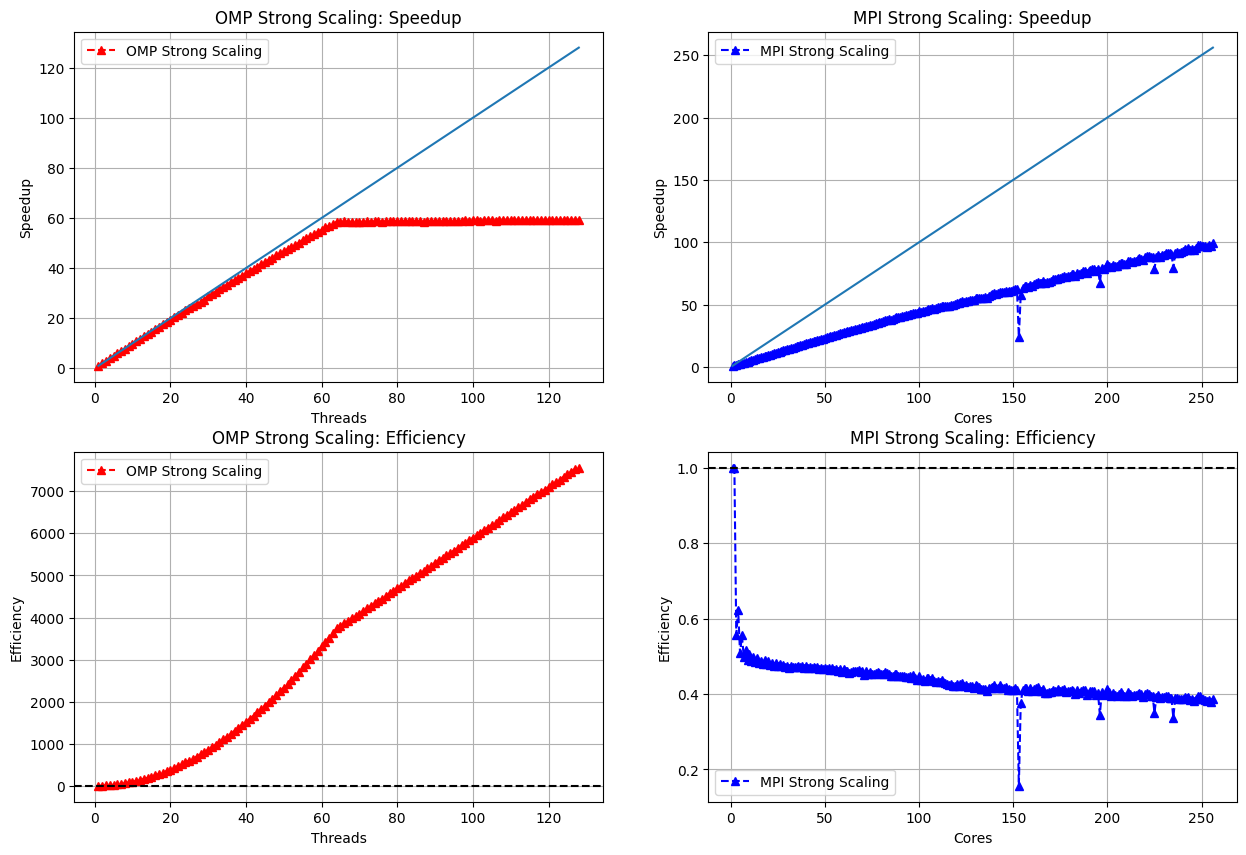

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.plot(omp_strong['threads'], omp_strong['time'][0]/omp_strong['time'], label='OMP Strong Scaling', color='red', linestyle='dashed', marker='^')
ax1.plot(omp_strong['threads'], omp_strong['threads'])
ax1.set_xlabel('Threads')
ax1.set_ylabel('Speedup')
ax1.set_title('OMP Strong Scaling: Speedup')
ax1.legend()
ax1.grid(True)

ax2.plot(mpi_strong['cores'], mpi_strong['time'][0]/mpi_strong['time'], label='MPI Strong Scaling', color='blue', linestyle='dashed', marker='^')
ax2.plot(mpi_strong['cores'], mpi_strong['cores'])
ax2.set_xlabel('Cores')
ax2.set_ylabel('Speedup')
ax2.set_title('MPI Strong Scaling: Speedup')
ax2.legend()
ax2.grid(True)

ax3.plot(omp_strong['threads'], omp_strong['time'][0]/(omp_strong['time']/omp_strong['threads']), label='OMP Strong Scaling', color='red', linestyle='dashed', marker='^')
ax3.axhline(y=1, color='black', linestyle='--')
ax3.set_xlabel('Threads')
ax3.set_ylabel('Efficiency')
ax3.set_title('OMP Strong Scaling: Efficiency')
ax3.legend()
ax3.grid(True)

ax4.plot(mpi_strong['cores'], (mpi_strong['time'][0]/mpi_strong['time'])/mpi_strong['cores'], label='MPI Strong Scaling', color='blue', linestyle='dashed', marker='^')
ax4.axhline(y=1, color='black', linestyle='--')
ax4.set_xlabel('Cores')
ax4.set_ylabel('Efficiency')
ax4.set_title('MPI Strong Scaling: Efficiency')
ax4.legend()
ax4.grid(True)


plt.show()

# Weak scaling

In [ ]:
mpi_weak = pd.read_csv('csv/mpi_weak_scaling.csv')
omp_weak = pd.read_csv('csv/omp_weak_scaling.csv')

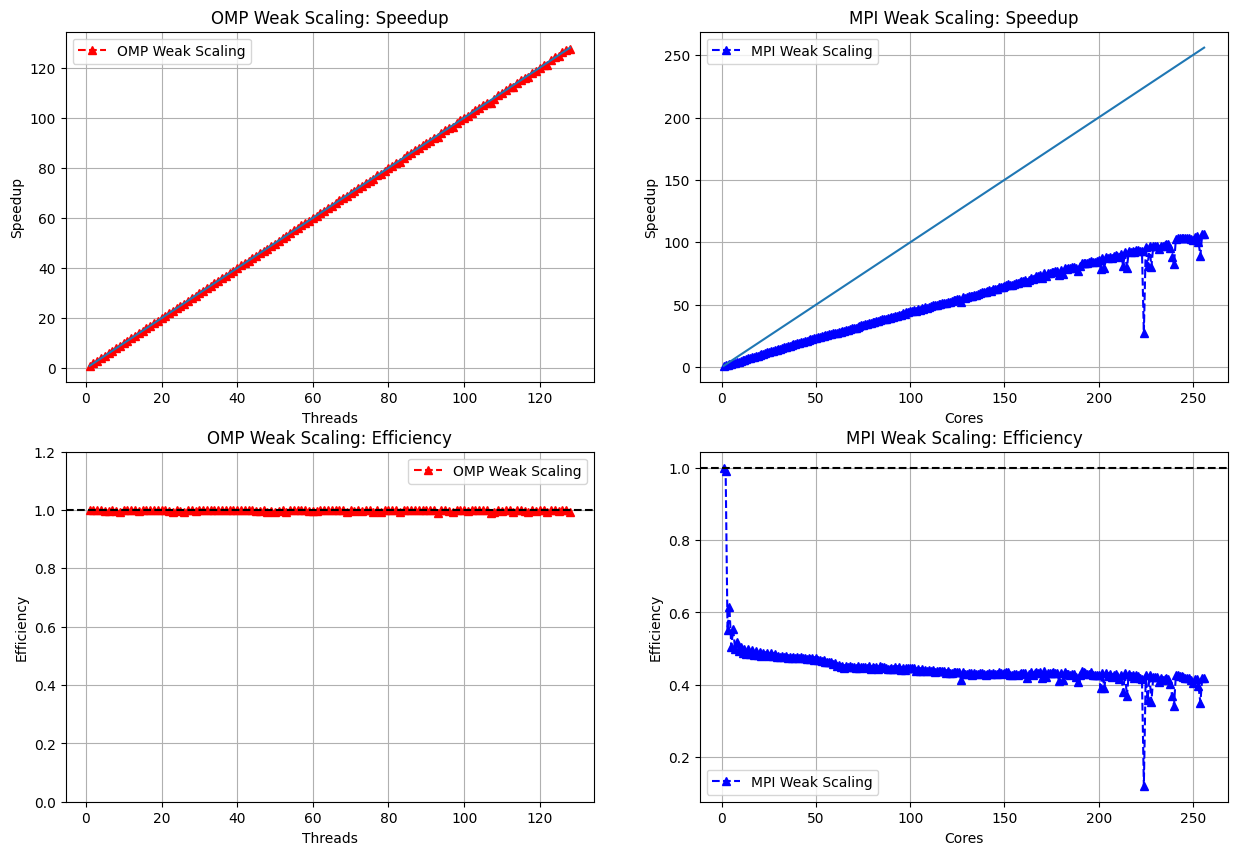

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.plot(omp_weak['threads'], omp_weak['time'][0]/omp_weak['time']*omp_weak['threads'], label='OMP Weak Scaling', color='red', linestyle='dashed', marker='^')
ax1.plot(omp_weak['threads'], omp_weak['threads'])
ax1.set_xlabel('Threads')
ax1.set_ylabel('Speedup')
ax1.set_title('OMP Weak Scaling: Speedup')
ax1.legend()
ax1.grid(True)

ax2.plot(mpi_weak['cores'], mpi_weak['time'][0]/mpi_weak['time']*mpi_weak['cores'], label='MPI Weak Scaling', color='blue', linestyle='dashed', marker='^')
ax2.plot(mpi_weak['cores'], mpi_weak['cores'])
ax2.set_xlabel('Cores')
ax2.set_ylabel('Speedup')
ax2.set_title('MPI Weak Scaling: Speedup')
ax2.legend()
ax2.grid(True)

ax3.plot(omp_weak['threads'], (omp_weak['time'][0]/omp_weak['time']), label='OMP Weak Scaling', color='red', linestyle='dashed', marker='^')
ax3.axhline(y=1, color='black', linestyle='--')
ax3.set_ylim(0, 1.2)
ax3.set_xlabel('Threads')
ax3.set_ylabel('Efficiency')
ax3.set_title('OMP Weak Scaling: Efficiency')
ax3.legend()
ax3.grid(True)

ax4.plot(mpi_weak['cores'], (mpi_weak['time'][0]/mpi_weak['time']), label='MPI Weak Scaling', color='blue', linestyle='dashed', marker='^')
ax4.axhline(y=1, color='black', linestyle='--')
ax4.set_xlabel('Cores')
ax4.set_ylabel('Efficiency')
ax4.set_title('MPI Weak Scaling: Efficiency')
ax4.legend()
ax4.grid(True)

plt.show()

AMDALSH

C:\Users\minut\AppData\Local\Temp\ipykernel_22164\396301857.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1 / ((1 - f)/ + f/P)
C:\Users\minut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


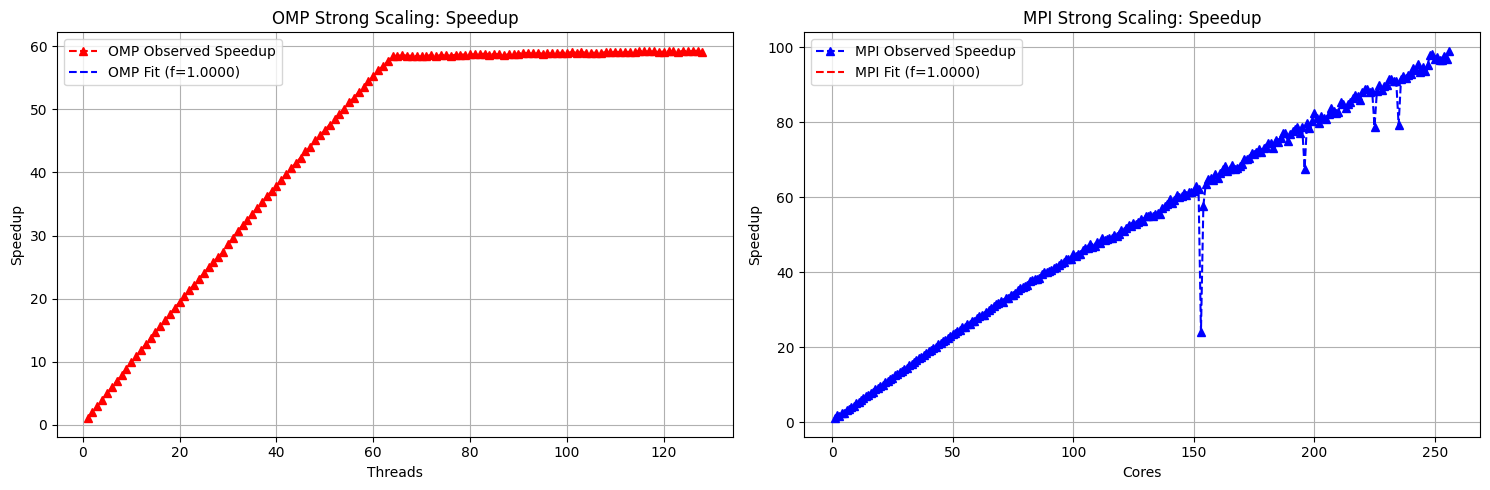

OMP: Estimated parallel fraction (f) = 1.0000
MPI: Estimated parallel fraction (f) = 1.0000


In [61]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# === Definizione di Amdahl's Law ===
def amdahl(P, f):
    return 1 / ((1 - f)/ + f/P)

# === Fitting per OMP ===
# Estrazione dei dati da omp_strong
omp_threads = np.array(omp_strong['threads'])
omp_speedup = np.array(omp_strong['time'][0] / omp_strong['time'])

# Fit dei dati di OMP
popt_omp, _ = curve_fit(amdahl, omp_threads, omp_speedup)
fitted_f_omp = popt_omp[0]

# Calcolo del fit teorico di OMP
omp_speedup_theoretical = amdahl(omp_threads, fitted_f_omp)

# === Fitting per MPI ===
# Estrazione dei dati da mpi_strong
mpi_cores = np.array(mpi_strong['cores'])
mpi_speedup = np.array(mpi_strong['time'][0] / mpi_strong['time'])

# Fit dei dati di MPI
popt_mpi, _ = curve_fit(amdahl, mpi_cores, mpi_speedup)
fitted_f_mpi = popt_mpi[0]

# Calcolo del fit teorico di MPI
mpi_speedup_theoretical = amdahl(mpi_cores, fitted_f_mpi)

# === Plot dei risultati ===
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax1, ax2 = axes.flatten()

# OMP Strong Scaling: Speedup
ax1.plot(omp_threads, omp_speedup, label='OMP Observed Speedup', color='red', linestyle='dashed', marker='^')
ax1.plot(omp_threads, omp_speedup_theoretical, label=f'OMP Fit (f={fitted_f_omp:.4f})', color='blue', linestyle='--')
ax1.set_xlabel('Threads')
ax1.set_ylabel('Speedup')
ax1.set_title('OMP Strong Scaling: Speedup')
ax1.legend()
ax1.grid(True)

# MPI Strong Scaling: Speedup
ax2.plot(mpi_cores, mpi_speedup, label='MPI Observed Speedup', color='blue', linestyle='dashed', marker='^')
ax2.plot(mpi_cores, mpi_speedup_theoretical, label=f'MPI Fit (f={fitted_f_mpi:.4f})', color='red', linestyle='--')
ax2.set_xlabel('Cores')
ax2.set_ylabel('Speedup')
ax2.set_title('MPI Strong Scaling: Speedup')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# === Stampa dei risultati del fit ===
print(f"OMP: Estimated parallel fraction (f) = {fitted_f_omp:.4f}")
print(f"MPI: Estimated parallel fraction (f) = {fitted_f_mpi:.4f}")


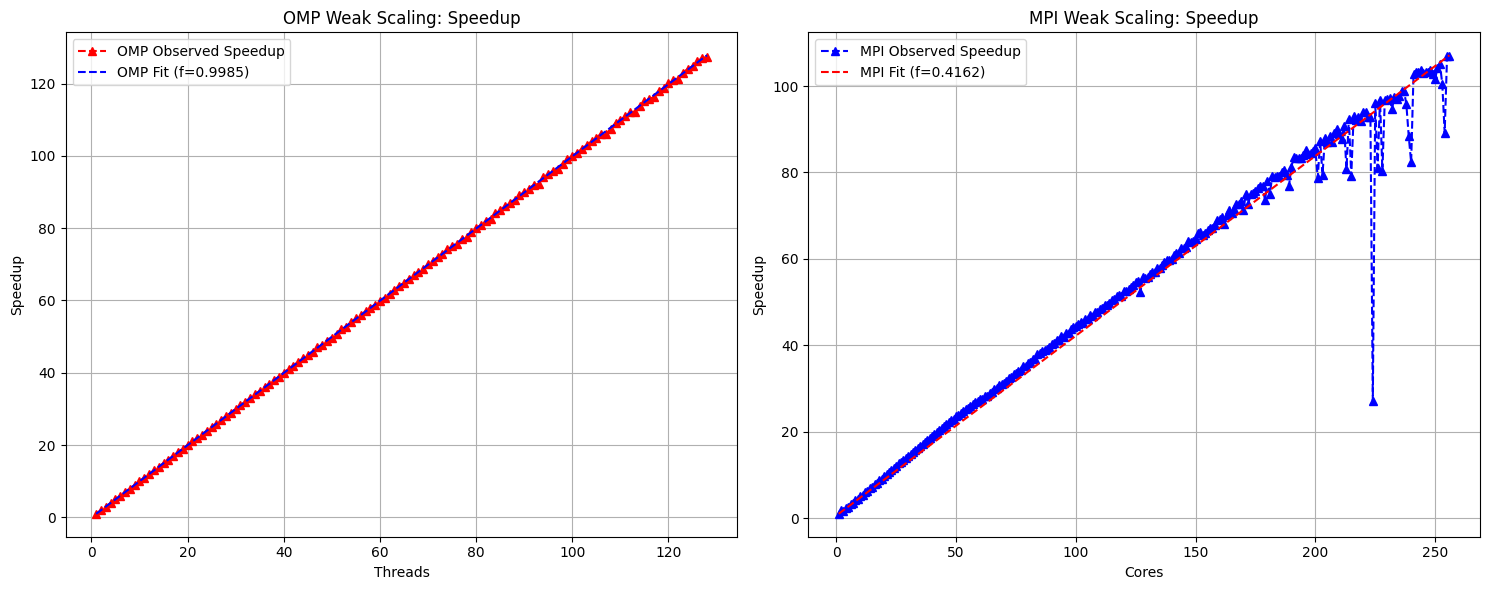

OMP: Estimated parallel fraction (f) = 0.9985
MPI: Estimated parallel fraction (f) = 0.4162


In [62]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# === Definizione di Gustafson's Law ===
def gustafson(P, f):
    return f*P + (1-f)

# === Fitting for OMP ===
# Extract data for OMP weak scaling
omp_threads = np.array(omp_weak['threads'])
omp_speedup = omp_weak['time'][0]/omp_weak['time']*omp_weak['threads']  # Observed speedup

# Fit Gustafson's Law for OMP
popt_omp, _ = curve_fit(gustafson, omp_threads, omp_speedup)
fitted_f_omp = popt_omp[0]

# Calculate the theoretical speedup for OMP
omp_speedup_theoretical = gustafson(omp_threads, fitted_f_omp)

# === Fitting for MPI ===
# Extract data for MPI weak scaling
mpi_cores = np.array(mpi_weak['cores'])
mpi_speedup = mpi_weak['time'][0]/mpi_weak['time']*mpi_weak['cores']  # Observed speedup

# Fit Gustafson's Law for MPI
popt_mpi, _ = curve_fit(gustafson, mpi_cores, mpi_speedup)
fitted_f_mpi = popt_mpi[0]

# Calculate the theoretical speedup for MPI
mpi_speedup_theoretical = gustafson(mpi_cores, fitted_f_mpi)

# === Plotting Results ===
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


# OMP Weak Scaling: Speedup
ax1.plot(omp_threads, omp_speedup, label='OMP Observed Speedup', color='red', linestyle='dashed', marker='^')
ax1.plot(omp_threads, omp_speedup_theoretical, label=f'OMP Fit (f={fitted_f_omp:.4f})', color='blue', linestyle='--')
ax1.set_xlabel('Threads')
ax1.set_ylabel('Speedup')
ax1.set_title('OMP Weak Scaling: Speedup')
ax1.legend()
ax1.grid(True)

# MPI Weak Scaling: Speedup
ax2.plot(mpi_cores, mpi_speedup, label='MPI Observed Speedup', color='blue', linestyle='dashed', marker='^')
ax2.plot(mpi_cores, mpi_speedup_theoretical, label=f'MPI Fit (f={fitted_f_mpi:.4f})', color='red', linestyle='--')
ax2.set_xlabel('Cores')
ax2.set_ylabel('Speedup')
ax2.set_title('MPI Weak Scaling: Speedup')
ax2.legend()
ax2.grid(True)


plt.tight_layout()
plt.show()

# === Print Fit Results ===
print(f"OMP: Estimated parallel fraction (f) = {fitted_f_omp:.4f}")
print(f"MPI: Estimated parallel fraction (f) = {fitted_f_mpi:.4f}")
